In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set() # seaborn 속성을 기본값으로 설정

파일에서 데이터를 읽어들임

In [3]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

#from enum import Enum
class Columns:
    # 원래 존재하는 항목
    PassengerId = "PassengerId"
    Survived = "Survived"
    Pclass = "Pclass"
    Name = "Name"
    Sex = "Sex"
    Age = "Age"
    SibSp = "SibSp"
    Parch = "Parch"
    Ticket = "Ticket"
    Fare = "Fare"
    Cabin = "Cabin"
    Embarked = "Embarked"
    
    # 새로 생성하는 항목
    Title = "Title"
    FareBand = "FareBand"
    Family = "Family"
    Deck = "Deck" # Cabin의 알파벳을 떼서 Deck을 지정한다.

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


test의 경우 예측에서 제출해야 하는 데이터이기에 Survived 항목이 없다.

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 입력 데이터 :

- **PassengerId** : 승객 번호<br>
- **Survived** : 생존여부(1: 생존, 0 : 사망)<br>
- **Pclass** : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)<br>
- **Name** : 승객 이름<br>
- **Sex** : 승객 성별 (male/female)<br>
- **Age** : 승객 나이(float) <br>
- **SibSp** : 동반한 형제자매, 배우자 수<br>
- **Parch** : 동반한 부모, 자식 수<br>
- **Ticket** : 티켓의 고유 넘버(문자열)<br>
- **Fare** 티켓의 요금(float)<br>
- **Cabin** : 객실 번호<br>
- **Embarked** : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)<br>



데이터가 존재하지 않는 feature들을 확인해 본다.

### 데이터 속성 확인

Pclass 에 따른 생존률

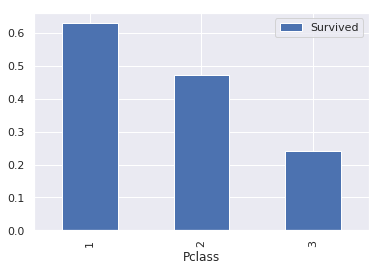

In [6]:
train[[Columns.Pclass, Columns.Survived]].groupby([Columns.Pclass]).mean().plot.bar()

성별에 따른 생존률

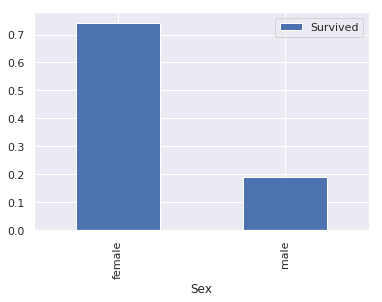

In [7]:
train[[Columns.Sex, Columns.Survived]].groupby([Columns.Sex]).mean().plot.bar()

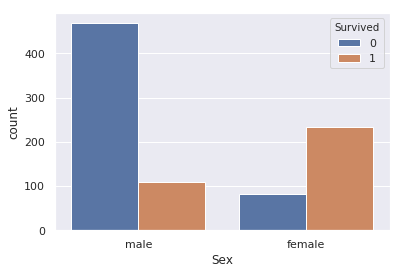

In [8]:
sns.countplot(x=Columns.Sex, hue=Columns.Survived, data=train)

Age에 따른 생존률

일단 Age의 분포는 어떨까?

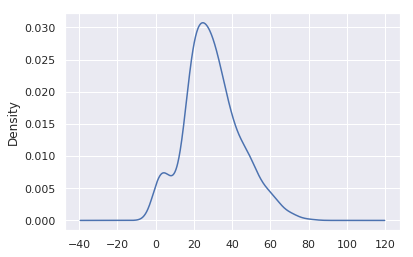

In [9]:
train[Columns.Age].plot.kde()

Age : 0  ~  80
gap: 6
[-1, 0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, inf]


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


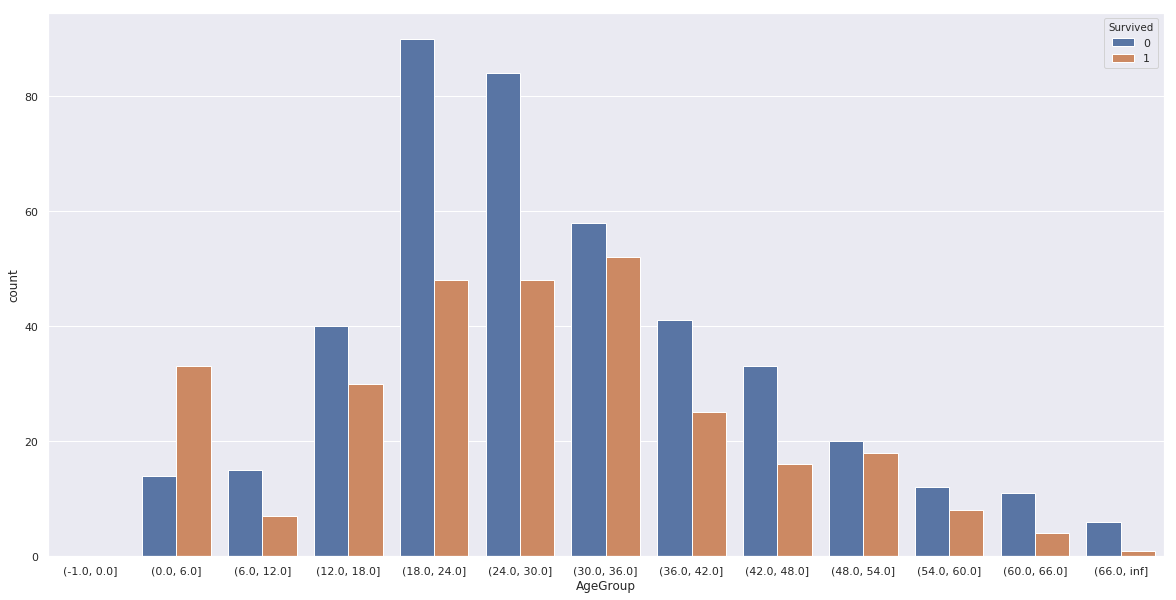

In [10]:
df = train[train[Columns.Age].isnull() == False]
#df.describe()

# 나이대로 나누어서 출력해 본다.
age_min = df[Columns.Age].min().astype('int')
age_max = df[Columns.Age].max().astype('int')
print("Age :", age_min, " ~ ", age_max)
gap = ((age_max - age_min) / 12).astype(int)
print('gap:', gap)

bins = [-1]
for i in range(12):
    bins.append(i * gap)
bins.append(np.inf)
print(bins)

_df = df
_df['AgeGroup'] = pd.cut(_df[Columns.Age], bins)
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot('AgeGroup', hue=Columns.Survived, data=_df, ax=ax)

Pclass/Age에 따른 생존률 변화량

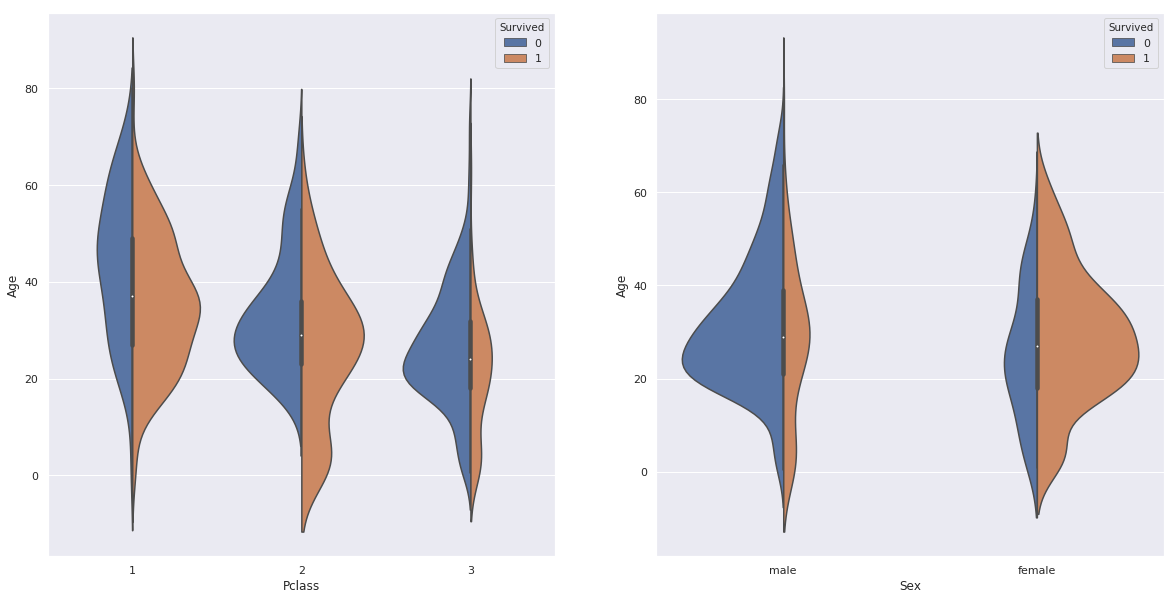

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.violinplot(Columns.Pclass, Columns.Age, hue=Columns.Survived, data=train, scale='count', split=True, ax=ax[0])
sns.violinplot(Columns.Sex, Columns.Age, hue=Columns.Survived, data=train, scale='count', split=True, ax=ax[1])

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

가족 수 ( Parch + SibSp + 1(자기자신))과 생존률을 비교해 본다.

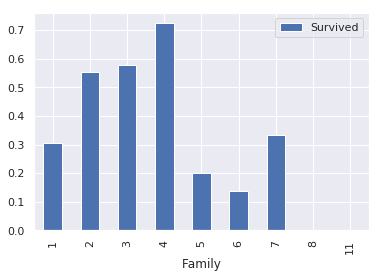

In [13]:
_train = train
_train['Family'] = _train[Columns.SibSp] + _train[Columns.Parch] + 1
_train[['Family', Columns.Survived]].groupby('Family').mean().plot.bar()

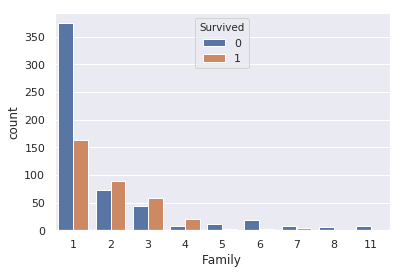

In [14]:
sns.countplot(x='Family', hue=Columns.Survived, data=_train)

### 데이터 가공

1. 비어있는 데이터(null)을 처리한다.<br>

###### 기존 feature들을 보완/가공
**Age** : null이 많고 나이가 중요할 것으로 판단되니 데이터를 채워야 할 필요가 있다.<br>
**Cabin** : null이 너무 많다.<br>
**Embarked** : null이 거의 없으므로 중요하지 않은 값으로 채워도 문제가 없어 보임<br>
**Parse, SibSp** : 합쳐서 Family로 만들고 삭제하자.

###### 새로운 feature를 추가
**Family** : Parch + SibSp + 1(자기자신)

## train/test를 따로 하지 말고, 합쳐서 처리하고 마지막(모델 넣기 직전)에 다시 분리한다.

In [15]:
train_len = train.shape[0]
merged = train.append(test, sort=False, ignore_index=True)
merged.head(n=merged.shape[0])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2.0


Parch와 SibSp를 Family로 변경한다.

In [16]:
merged[Columns.Family] = merged[Columns.Parch] + merged[Columns.SibSp] + 1
if Columns.Parch in merged:    
    merged = merged.drop([Columns.Parch], axis=1)
if Columns.SibSp in merged:
    merged = merged.drop([Columns.SibSp], axis=1)
    
merged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


### Embarked 정리
빈 갯수가 몇개 없으므로 그냥 가장 많은 것으로 채운다.

In [17]:
most_embarked_label = merged[Columns.Embarked].value_counts().index[0]

merged.fillna({Columns.Embarked : most_embarked_label})
merged.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309,1308.000000,295,1307,1309.000000
unique,NaN,NaN,NaN,1307,2,NaN,929,NaN,186,3,NaN
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN
freq,NaN,NaN,NaN,2,843,NaN,11,NaN,6,914,NaN
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,NaN,33.295479,NaN,NaN,1.883881
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,NaN,51.758668,NaN,NaN,1.583639
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,NaN,0.000000,NaN,NaN,1.000000
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,NaN,7.895800,NaN,NaN,1.000000
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,NaN,14.454200,NaN,NaN,1.000000
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,NaN,31.275000,NaN,NaN,2.000000


In [18]:
mapping = pd.Series([1,2,3], ['S', 'C', 'Q'])
merged[Columns.Embarked] = merged[Columns.Embarked].map(mapping)

# float로 변경:
merged[Columns.Embarked] = merged[Columns.Embarked].astype('float')

In [19]:
merged.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309,1308.000000,295,1307.000000,1309.000000
unique,NaN,NaN,NaN,1307,2,NaN,929,NaN,186,NaN,NaN
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,CA. 2343,NaN,C23 C25 C27,NaN,NaN
freq,NaN,NaN,NaN,2,843,NaN,11,NaN,6,NaN,NaN
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,NaN,33.295479,NaN,1.394797,1.883881
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,NaN,51.758668,NaN,0.653817,1.583639
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,NaN,0.000000,NaN,1.000000,1.000000
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,NaN,7.895800,NaN,1.000000,1.000000
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,NaN,14.454200,NaN,1.000000,1.000000
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,NaN,31.275000,NaN,2.000000,2.000000


Name에서 호칭을 추출해서 새 항목(Title)을 추가하고 숫자값으로 변환한다.
Name은 지운다.

In [20]:
# Name에서 Title 추출(그냥 알파벳 끝에 .이 붙어 있는걸 추출한다.)
merged[Columns.Title] = merged.Name.str.extract('([A-Za-z]+)\. ', expand=False) # expand:True면 DataFrame을, False면 Series를 리턴한다.

print("initial titles : ", merged[Columns.Title].value_counts().index)

# 정리
merged[Columns.Title] = merged[Columns.Title].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
merged[Columns.Title] = merged[Columns.Title].replace(['Countess', 'Lady', 'Sir'], 'Royal')
merged[Columns.Title] = merged[Columns.Title].replace(['Mlle'], 'Miss')
merged[Columns.Title] = merged[Columns.Title].replace(['Ms'], 'Miss')
merged[Columns.Title] = merged[Columns.Title].replace(['Mme'], 'Mrs')
    
print(merged[[Columns.Title, Columns.Survived]].groupby(Columns.Title).mean())

idxs = merged[Columns.Title].value_counts().index # 많은 순서대로 정렬해서 오름차순으로 값을 매김
print(idxs)
mapping = {}
for i in range(len(idxs)):
    mapping[idxs[i]] = i + 1
print(mapping)

merged[Columns.Title] = merged[Columns.Title].map(mapping)


if Columns.Name in merged:
    merged = merged.drop([Columns.Name], axis=1)
    
merged.head()

initial titles :  Index(['Mr', 'Miss', 'Mrs', 'Master', 'Rev', 'Dr', 'Col', 'Mlle', 'Major',
       'Ms', 'Sir', 'Dona', 'Don', 'Mme', 'Lady', 'Capt', 'Jonkheer',
       'Countess'],
      dtype='object')
        Survived
Title           
Master  0.575000
Miss    0.702703
Mr      0.156673
Mrs     0.793651
Rare    0.285714
Royal   1.000000
Index(['Mr', 'Miss', 'Mrs', 'Master', 'Rare', 'Royal'], dtype='object')
{'Master': 4, 'Mr': 1, 'Mrs': 3, 'Royal': 6, 'Miss': 2, 'Rare': 5}


,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0.0,3,male,22.0,A/5 21171,7.2500,NaN,1.0,2,1
1,2,1.0,1,female,38.0,PC 17599,71.2833,C85,2.0,2,3
2,3,1.0,3,female,26.0,STON/O2. 3101282,7.9250,NaN,1.0,1,2
3,4,1.0,1,female,35.0,113803,53.1000,C123,1.0,2,3
4,5,0.0,3,male,35.0,373450,8.0500,NaN,1.0,1,1


Sex 항목을 숫자로 변경

In [21]:
mapping = {'male':0, 'female':1}
merged[Columns.Sex] = merged[Columns.Sex].map(mapping)

In [22]:
merged.head(n=10)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0.0,3,0,22.0,A/5 21171,7.2500,NaN,1.0,2,1
1,2,1.0,1,1,38.0,PC 17599,71.2833,C85,2.0,2,3
2,3,1.0,3,1,26.0,STON/O2. 3101282,7.9250,NaN,1.0,1,2
3,4,1.0,1,1,35.0,113803,53.1000,C123,1.0,2,3
4,5,0.0,3,0,35.0,373450,8.0500,NaN,1.0,1,1
5,6,0.0,3,0,NaN,330877,8.4583,NaN,3.0,1,1
6,7,0.0,1,0,54.0,17463,51.8625,E46,1.0,1,1
7,8,0.0,3,0,2.0,349909,21.0750,NaN,1.0,5,4
8,9,1.0,3,1,27.0,347742,11.1333,NaN,1.0,3,3
9,10,1.0,2,1,14.0,237736,30.0708,NaN,2.0,2,3


### 비어있는 Age를 처리

Title로 적당히 추리한다. (너무 때려맞추기가 아닌지...?)

In [23]:
# {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5, 'Royal': 6}

mapping = {1:21, 2:21, 3:24, 4:40, 5:50, 6:60}
def guess_age(row):
    return mapping[row[Columns.Title]]

def fixup_age(df):
    for idx, row in df[df[Columns.Age].isnull() == True].iterrows():
        df.loc[idx, Columns.Age] = guess_age(row)
    return df
    
merged = fixup_age(merged)
merged.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309,1308.000000,295,1307.000000,1309.000000,1309.000000
unique,NaN,NaN,NaN,NaN,NaN,929,NaN,186,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,11,NaN,6,NaN,NaN,NaN
mean,655.000000,0.383838,2.294882,0.355997,28.296921,NaN,33.295479,NaN,1.394797,1.883881,1.734148
std,378.020061,0.486592,0.837836,0.478997,13.371730,NaN,51.758668,NaN,0.653817,1.583639,1.027706
min,1.000000,0.000000,1.000000,0.000000,0.170000,NaN,0.000000,NaN,1.000000,1.000000,1.000000
25%,328.000000,0.000000,2.000000,0.000000,21.000000,NaN,7.895800,NaN,1.000000,1.000000,1.000000
50%,655.000000,0.000000,3.000000,0.000000,24.000000,NaN,14.454200,NaN,1.000000,1.000000,1.000000
75%,982.000000,1.000000,3.000000,1.000000,36.000000,NaN,31.275000,NaN,2.000000,2.000000,2.000000


### Ticket 항목을 분석

In [24]:
merged[Columns.Ticket].unique().shape

(929,)

ticket 항목 중 중복되는 것이 있다는 것을 알 수 있다.
중복되는 항목들의 Fare를 찾아보면 모두 같다.
===> ticket이 중복되었다고 돈을 나눠야 할 이유는 없을지도...


Ticket: PC 17599
1       71.2833
1125    71.2833
Name: Fare, dtype: float64 1       C85
1125    C85
Name: Cabin, dtype: object 1       2.0
1125    2.0
Name: Embarked, dtype: float64

Ticket: 113803
3      53.1
137    53.1
Name: Fare, dtype: float64 3      C123
137    C123
Name: Cabin, dtype: object 3      1.0
137    1.0
Name: Embarked, dtype: float64

Ticket: 17463
6       51.8625
1037    51.8625
Name: Fare, dtype: float64 6       E46
1037    E46
Name: Cabin, dtype: object 6       1.0
1037    1.0
Name: Embarked, dtype: float64

Ticket: 349909
7       21.075
24      21.075
374     21.075
567     21.075
1280    21.075
Name: Fare, dtype: float64 7       NaN
24      NaN
374     NaN
567     NaN
1280    NaN
Name: Cabin, dtype: object 7       1.0
24      1.0
374     1.0
567     1.0
1280    1.0
Name: Embarked, dtype: float64

Ticket: 347742
8      11.1333
172    11.1333
869    11.1333
Name: Fare, dtype: float64 8      NaN
172    NaN
869    NaN
Name: Cabin, dtype: object 8      1.0
172    1.0


Name: Embarked, dtype: float64

Ticket: PC 17759
97      63.3583
1241    63.3583
Name: Fare, dtype: float64 97      D10 D12
1241    D10 D12
Name: Cabin, dtype: object 97      2.0
1241    2.0
Name: Embarked, dtype: float64

Ticket: 231919
98     23.0
651    23.0
Name: Fare, dtype: float64 98     NaN
651    NaN
Name: Cabin, dtype: object 98     1.0
651    1.0
Name: Embarked, dtype: float64

Ticket: 244367
99     26.0
316    26.0
Name: Fare, dtype: float64 99     NaN
316    NaN
Name: Cabin, dtype: object 99     1.0
316    1.0
Name: Embarked, dtype: float64

Ticket: 35281
102    77.2875
124    77.2875
Name: Fare, dtype: float64 102    D26
124    D26
Name: Cabin, dtype: object 102    1.0
124    1.0
Name: Embarked, dtype: float64

Ticket: 371110
109    24.15
517    24.15
768    24.15
Name: Fare, dtype: float64 109    NaN
517    NaN
768    NaN
Name: Cabin, dtype: object 109    3.0
517    3.0
768    3.0
Name: Embarked, dtype: float64

Ticket: 110465
110    52.0
475    52.0
Name: Fare, dtype: f

Ticket: CA. 2343
159     69.55
180     69.55
201     69.55
324     69.55
792     69.55
846     69.55
863     69.55
1079    69.55
1233    69.55
1251    69.55
1256    69.55
Name: Fare, dtype: float64 159     NaN
180     NaN
201     NaN
324     NaN
792     NaN
846     NaN
863     NaN
1079    NaN
1233    NaN
1251    NaN
1256    NaN
Name: Cabin, dtype: object 159     1.0
180     1.0
201     1.0
324     1.0
792     1.0
846     1.0
863     1.0
1079    1.0
1233    1.0
1251    1.0
1256    1.0
Name: Embarked, dtype: float64

Ticket: 347077
25      31.3875
182     31.3875
233     31.3875
261     31.3875
1045    31.3875
1065    31.3875
1270    31.3875
Name: Fare, dtype: float64 25      NaN
182     NaN
233     NaN
261     NaN
1045    NaN
1065    NaN
1270    NaN
Name: Cabin, dtype: object 25      1.0
182     1.0
233     1.0
261     1.0
1045    1.0
1065    1.0
1270    1.0
Name: Embarked, dtype: float64

Ticket: 230136
183     39.0
618     39.0
1069    39.0
1217    39.0
Name: Fare, dtype: float64 183 

Ticket: PC 17582
268    153.4625
332    153.4625
609    153.4625
Name: Fare, dtype: float64 268    C125
332     C91
609    C125
Name: Cabin, dtype: object 268    1.0
332    1.0
609    1.0
Name: Embarked, dtype: float64

Ticket: PC 17760
269     135.6333
325     135.6333
373     135.6333
1205    135.6333
Name: Fare, dtype: float64 269     C99
325     C32
373     NaN
1205    C32
Name: Cabin, dtype: object 269     1.0
325     2.0
373     2.0
1205    2.0
Name: Embarked, dtype: float64

Ticket: 113798
270    31.0
842    31.0
Name: Fare, dtype: float64 270    NaN
842    NaN
Name: Cabin, dtype: object 270    1.0
842    2.0
Name: Embarked, dtype: float64

Ticket: LINE
179    0.0
271    0.0
302    0.0
597    0.0
Name: Fare, dtype: float64 179    NaN
271    NaN
302    NaN
597    NaN
Name: Cabin, dtype: object 179    1.0
271    1.0
302    1.0
597    1.0
Name: Embarked, dtype: float64

Ticket: 250644
272    19.5
446    19.5
Name: Fare, dtype: float64 272    NaN
446    NaN
Name: Cabin, dtype: objec

Name: Fare, dtype: float64 347    NaN
949    NaN
Name: Cabin, dtype: object 347    1.0
949    1.0
Name: Embarked, dtype: float64

Ticket: C.A. 37671
348    15.9
489    15.9
940    15.9
Name: Fare, dtype: float64 348    NaN
489    NaN
940    NaN
Name: Cabin, dtype: object 348    1.0
489    1.0
940    1.0
Name: Embarked, dtype: float64

Ticket: 349237
49     17.8
353    17.8
Name: Fare, dtype: float64 49     NaN
353    NaN
Name: Cabin, dtype: object 49     1.0
353    1.0
Name: Embarked, dtype: float64

Ticket: 113505
166    55.0
356    55.0
Name: Fare, dtype: float64 166    E33
356    E33
Name: Cabin, dtype: object 166    1.0
356    1.0
Name: Embarked, dtype: float64

Ticket: 347088
63     27.9
167    27.9
360    27.9
634    27.9
642    27.9
819    27.9
Name: Fare, dtype: float64 63     NaN
167    NaN
360    NaN
634    NaN
642    NaN
819    NaN
Name: Cabin, dtype: object 63     1.0
167    1.0
360    1.0
634    1.0
642    1.0
819    1.0
Name: Embarked, dtype: float64

Ticket: SC/PARIS 216

Name: Fare, dtype: float64 457     D21
1136    D21
Name: Cabin, dtype: object 457     1.0
1136    1.0
Name: Embarked, dtype: float64

Ticket: 239853
277    0.0
413    0.0
466    0.0
Name: Fare, dtype: float64 277    NaN
413    NaN
466    NaN
Name: Cabin, dtype: object 277    1.0
413    1.0
466    1.0
Name: Embarked, dtype: float64

Ticket: 2666
448    19.2583
469    19.2583
644    19.2583
858    19.2583
Name: Fare, dtype: float64 448    NaN
469    NaN
644    NaN
858    NaN
Name: Cabin, dtype: object 448    2.0
469    2.0
644    2.0
858    2.0
Name: Embarked, dtype: float64

Ticket: C.A. 34651
58      27.75
450     27.75
472     27.75
1141    27.75
Name: Fare, dtype: float64 58      NaN
450     NaN
472     NaN
1141    NaN
Name: Cabin, dtype: object 58      1.0
450     1.0
472     1.0
1141    1.0
Name: Embarked, dtype: float64

Ticket: 110465
110    52.0
475    52.0
Name: Fare, dtype: float64 110    C110
475     A14
Name: Cabin, dtype: object 110    1.0
475    1.0
Name: Embarked, dtype: 

Ticket: PC 17757
380     227.525
557     227.525
700     227.525
716     227.525
1093    227.525
Name: Fare, dtype: float64 380         NaN
557         NaN
700     C62 C64
716         C45
1093    C62 C64
Name: Cabin, dtype: object 380     2.0
557     2.0
700     2.0
716     2.0
1093    2.0
Name: Embarked, dtype: float64

Ticket: 110413
262    79.65
558    79.65
585    79.65
Name: Fare, dtype: float64 262    E67
558    E67
585    E68
Name: Cabin, dtype: object 262    1.0
558    1.0
585    1.0
Name: Embarked, dtype: float64

Ticket: 345572
559     17.4
1151    17.4
Name: Fare, dtype: float64 559     NaN
1151    NaN
Name: Cabin, dtype: object 559     1.0
1151    1.0
Name: Embarked, dtype: float64

Ticket: A/4 48871
565    24.15
811    24.15
900    24.15
Name: Fare, dtype: float64 565    NaN
811    NaN
900    NaN
Name: Cabin, dtype: object 565    1.0
811    1.0
900    1.0
Name: Embarked, dtype: float64

Ticket: 349909
7       21.075
24      21.075
374     21.075
567     21.075
1280    21.0

Name: Fare, dtype: float64 63     NaN
167    NaN
360    NaN
634    NaN
642    NaN
819    NaN
Name: Cabin, dtype: object 63     1.0
167    1.0
360    1.0
634    1.0
642    1.0
819    1.0
Name: Embarked, dtype: float64

Ticket: 1601
74     56.4958
169    56.4958
509    56.4958
643    56.4958
692    56.4958
826    56.4958
838    56.4958
930    56.4958
Name: Fare, dtype: float64 74     NaN
169    NaN
509    NaN
643    NaN
692    NaN
826    NaN
838    NaN
930    NaN
Name: Cabin, dtype: object 74     1.0
169    1.0
509    1.0
643    1.0
692    1.0
826    1.0
838    1.0
930    1.0
Name: Embarked, dtype: float64

Ticket: 2666
448    19.2583
469    19.2583
644    19.2583
858    19.2583
Name: Fare, dtype: float64 448    NaN
469    NaN
644    NaN
858    NaN
Name: Cabin, dtype: object 448    2.0
469    2.0
644    2.0
858    2.0
Name: Embarked, dtype: float64

Ticket: PC 17572
52     76.7292
645    76.7292
681    76.7292
Name: Fare, dtype: float64 52     D33
645    D33
681    D49
Name: Cabin, dtype

Ticket: WE/P 5735
540    71.0
745    71.0
Name: Fare, dtype: float64 540    B22
745    B22
Name: Cabin, dtype: object 540    1.0
745    1.0
Name: Embarked, dtype: float64

Ticket: C.A. 2673
279     20.25
746     20.25
1283    20.25
Name: Fare, dtype: float64 279     NaN
746     NaN
1283    NaN
Name: Cabin, dtype: object 279     1.0
746     1.0
1283    1.0
Name: Embarked, dtype: float64

Ticket: 113773
748     53.1
1073    53.1
Name: Fare, dtype: float64 748     D30
1073    D30
Name: Cabin, dtype: object 748     1.0
1073    1.0
Name: Embarked, dtype: float64

Ticket: 29103
750     23.0
980     23.0
1153    23.0
Name: Fare, dtype: float64 750     NaN
980     NaN
1153    NaN
Name: Cabin, dtype: object 750     1.0
980     1.0
1153    1.0
Name: Embarked, dtype: float64

Ticket: 392096
751    12.475
823    12.475
Name: Fare, dtype: float64 751    E121
823    E121
Name: Cabin, dtype: object 751    1.0
823    1.0
Name: Embarked, dtype: float64

Ticket: 220845
615     65.0
754     65.0
1121    

Name: Fare, dtype: float64 13     NaN
119    NaN
541    NaN
542    NaN
610    NaN
813    NaN
850    NaN
Name: Cabin, dtype: object 13     1.0
119    1.0
541    1.0
542    1.0
610    1.0
813    1.0
850    1.0
Name: Embarked, dtype: float64

Ticket: 2678
140    15.2458
852    15.2458
971    15.2458
Name: Fare, dtype: float64 140    NaN
852    NaN
971    NaN
Name: Cabin, dtype: object 140    2.0
852    2.0
971    2.0
Name: Embarked, dtype: float64

Ticket: PC 17592
853     39.4
1282    39.4
Name: Fare, dtype: float64 853     D28
1282    D28
Name: Cabin, dtype: object 853     1.0
1282    1.0
Name: Embarked, dtype: float64

Ticket: 244252
249    26.0
854    26.0
Name: Fare, dtype: float64 249    NaN
854    NaN
Name: Cabin, dtype: object 249    1.0
854    1.0
Name: Embarked, dtype: float64

Ticket: 392091
855     9.35
1198    9.35
Name: Fare, dtype: float64 855     NaN
1198    NaN
Name: Cabin, dtype: object 855     1.0
1198    1.0
Name: Embarked, dtype: float64

Ticket: 36928
318     164.866

Name: Fare, dtype: float64 774    NaN
943    NaN
Name: Cabin, dtype: object 774    1.0
943    1.0
Name: Embarked, dtype: float64

Ticket: 19950
27     263.0
88     263.0
341    263.0
438    263.0
944    263.0
960    263.0
Name: Fare, dtype: float64 27     C23 C25 C27
88     C23 C25 C27
341    C23 C25 C27
438    C23 C25 C27
944    C23 C25 C27
960    C23 C25 C27
Name: Cabin, dtype: object 27     1.0
88     1.0
341    1.0
438    1.0
944    1.0
960    1.0
Name: Embarked, dtype: float64

Ticket: 382652
16     29.125
171    29.125
278    29.125
787    29.125
885    29.125
946    29.125
Name: Fare, dtype: float64 16     NaN
171    NaN
278    NaN
787    NaN
885    NaN
946    NaN
Name: Cabin, dtype: object 16     3.0
171    3.0
278    3.0
787    3.0
885    3.0
946    3.0
Name: Embarked, dtype: float64

Ticket: 386525
347    16.1
949    16.1
Name: Fare, dtype: float64 347    NaN
949    NaN
Name: Cabin, dtype: object 347    1.0
949    1.0
Name: Embarked, dtype: float64

Ticket: PC 17608
311     2

Name: Cabin, dtype: object 1044    1.0
1154    1.0
Name: Embarked, dtype: float64

Ticket: 347077
25      31.3875
182     31.3875
233     31.3875
261     31.3875
1045    31.3875
1065    31.3875
1270    31.3875
Name: Fare, dtype: float64 25      NaN
182     NaN
233     NaN
261     NaN
1045    NaN
1065    NaN
1270    NaN
Name: Cabin, dtype: object 25      1.0
182     1.0
233     1.0
261     1.0
1045    1.0
1065    1.0
1270    1.0
Name: Embarked, dtype: float64

Ticket: PC 17483
527     221.7792
972     221.7792
1005    221.7792
1047    221.7792
Name: Fare, dtype: float64 527         C95
972     C55 C57
1005    C55 C57
1047        C97
Name: Cabin, dtype: object 527     1.0
972     1.0
1005    1.0
1047    1.0
Name: Embarked, dtype: float64

Ticket: SOTON/O.Q. 3101315
1050    13.775
1172    13.775
1300    13.775
Name: Fare, dtype: float64 1050    NaN
1172    NaN
1300    NaN
Name: Cabin, dtype: object 1050    1.0
1172    1.0
1300    1.0
Name: Embarked, dtype: float64

Ticket: 2650
255     15

Ticket: 2660
976     14.4542
1140    14.4542
Name: Fare, dtype: float64 976     NaN
1140    NaN
Name: Cabin, dtype: object 976     2.0
1140    2.0
Name: Embarked, dtype: float64

Ticket: C.A. 34651
58      27.75
450     27.75
472     27.75
1141    27.75
Name: Fare, dtype: float64 58      NaN
450     NaN
472     NaN
1141    NaN
Name: Cabin, dtype: object 58      1.0
450     1.0
472     1.0
1141    1.0
Name: Embarked, dtype: float64

Ticket: 13508
1143    136.7792
1163    136.7792
Name: Fare, dtype: float64 1143    C89
1163    C89
Name: Cabin, dtype: object 1143    2.0
1163    2.0
Name: Embarked, dtype: float64

Ticket: 345572
559     17.4
1151    17.4
Name: Fare, dtype: float64 559     NaN
1151    NaN
Name: Cabin, dtype: object 559     1.0
1151    1.0
Name: Embarked, dtype: float64

Ticket: 29103
750     23.0
980     23.0
1153    23.0
Name: Fare, dtype: float64 750     NaN
980     NaN
1153    NaN
Name: Cabin, dtype: object 750     1.0
980     1.0
1153    1.0
Name: Embarked, dtype: float

Name: Fare, dtype: float64 817     NaN
827     NaN
1252    NaN
Name: Cabin, dtype: object 817     2.0
827     2.0
1252    2.0
Name: Embarked, dtype: float64

Ticket: CA 31352
1169    21.0
1253    21.0
Name: Fare, dtype: float64 1169    NaN
1253    NaN
Name: Cabin, dtype: object 1169    1.0
1253    1.0
Name: Embarked, dtype: float64

Ticket: 11765
370     55.4417
1255    55.4417
Name: Fare, dtype: float64 370     E50
1255    E50
Name: Cabin, dtype: object 370     2.0
1255    2.0
Name: Embarked, dtype: float64

Ticket: CA. 2343
159     69.55
180     69.55
201     69.55
324     69.55
792     69.55
846     69.55
863     69.55
1079    69.55
1233    69.55
1251    69.55
1256    69.55
Name: Fare, dtype: float64 159     NaN
180     NaN
201     NaN
324     NaN
792     NaN
846     NaN
863     NaN
1079    NaN
1233    NaN
1251    NaN
1256    NaN
Name: Cabin, dtype: object 159     1.0
180     1.0
201     1.0
324     1.0
792     1.0
846     1.0
863     1.0
1079    1.0
1233    1.0
1251    1.0
1256    

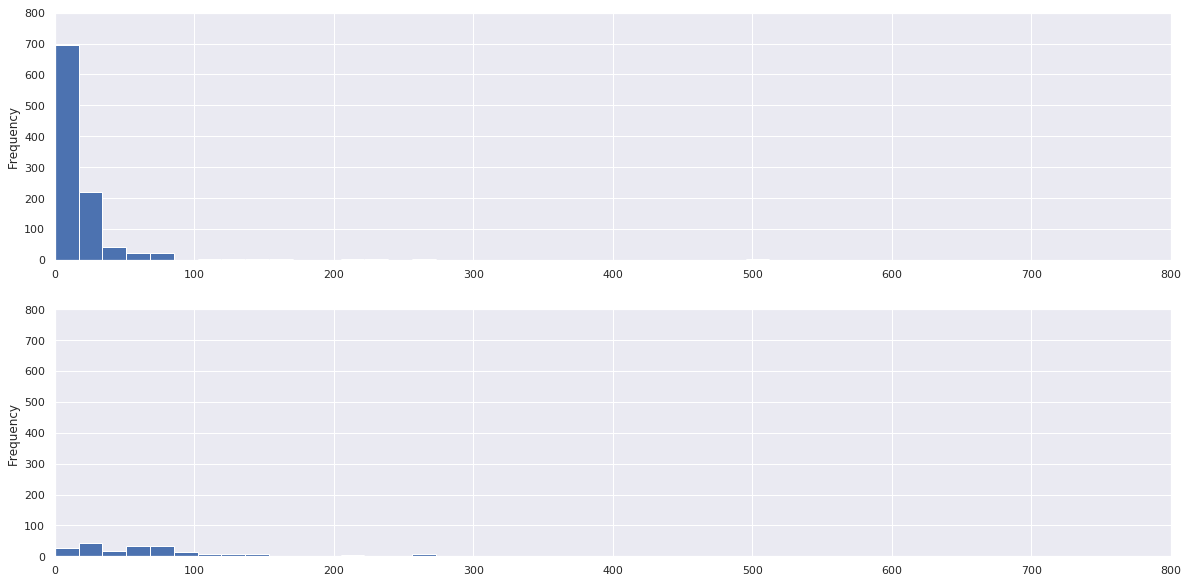

In [25]:
tickets = merged[Columns.Ticket]

df = merged

# 중복되는 ticket을 가진 사람들의 fare는? => 같다.
def show_shared_tickets(df):
    for ticket in tickets:
        if df[df[Columns.Ticket] == ticket].shape[0] > 1:
            print("\nTicket:", ticket)
            print(df[df[Columns.Ticket] == ticket][Columns.Fare], df[df[Columns.Ticket] == ticket][Columns.Cabin], \
                  df[df[Columns.Ticket] == ticket][Columns.Embarked])

#show_shared_tickets(df)
            
'''
표에 액수가 중복되었다고 돈을 나눌 필요는 없을 것 같아서 주석 처리함.
ticket number가 중복이어도 돈을 나눠서 찍었을 수도 있어서...
'''

# def divide_fare_by_shared_tickets(df):
#     for ticket in tickets:
#         tmpdf = df[df[Columns.Ticket] == ticket]
#         if df[df[Columns.Ticket] == ticket].shape[0] > 1:
#             total_fare = df[df[Columns.Ticket] == ticket][Columns.Fare].value_counts().index[0]            
#             per_people = df[df[Columns.Ticket] == ticket].shape[0]            
#             df[df[Columns.Ticket] == ticket][Columns.Fare] = total_fare / per_people
#     return df
            
# df = divide_fare_by_shared_tickets(df)


#cabin / fare
#non-cabin / fare

# cabin이 있고/없고에 따른 fare의 차이
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].set_xlim([0, 800])
ax[1].set_xlim([0, 800])
ax[0].set_ylim([0, 800])
ax[1].set_ylim([0, 800])
df = df[df[Columns.Cabin].isnull()]
df[Columns.Fare].plot.hist(ax=ax[0], bins=30)
print("No Cabin Fare:", df[Columns.Fare].mean())

df = train[train[Columns.Cabin].isnull() == False]
df[Columns.Fare].plot.hist(ax=ax[1], bins=30)
print("Cabin Fare:", df[Columns.Fare].mean())



Ticket이 같은 사람의 경우 다른 사람의 Cabin을 넣도록 한다.
=>사실 몇명 안된다.

In [26]:
def empty_cabin_but_oterhs_have_cabin_cnt(df):
    ret = 0    
    # cabin이 null이면 ticket이 같은걸 찾아서 cabin값을 가져온다.
    for idx, row in df[df[Columns.Cabin].isnull() == True].iterrows(): #Cabin이 없는 행에 대해        
        ticket = row[Columns.Ticket]
        cabin = df[df[Columns.Ticket] == ticket][Columns.Cabin].value_counts().index #같은 ticket을 가진 사람들 중 가장 많은 Cabin값을 가져온다.
        if len(cabin) > 0: #Cabin이 있으면 현제 row는 Cabin이 없지만 채울 수 있는 것이다.
            #print(row)
            ret = ret + 1
            
            
    return ret

print("count of fillable cabin : ", empty_cabin_but_oterhs_have_cabin_cnt(merged))

merged.head()





count of fillable cabin :  16


,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0.0,3,0,22.0,A/5 21171,7.2500,NaN,1.0,2,1
1,2,1.0,1,1,38.0,PC 17599,71.2833,C85,2.0,2,3
2,3,1.0,3,1,26.0,STON/O2. 3101282,7.9250,NaN,1.0,1,2
3,4,1.0,1,1,35.0,113803,53.1000,C123,1.0,2,3
4,5,0.0,3,0,35.0,373450,8.0500,NaN,1.0,1,1


In [27]:
tm = merged.copy()

tickets = merged[Columns.Ticket]

# 중복되는 ticket을 가진 사람들의 cabin은?
# ==> cabin값이 비어 있으면 ticket이 같은 다른 사람들의 cabin값으로 채운다.
def fixup_cabin_by_ticket(df):
    # cabin이 null이면 ticket이 같은걸 찾아서 cabin값을 가져온다.
    fixed = 0
    iterdf = df[df[Columns.Cabin].isnull() == True].copy()
    for idx, row in iterdf.iterrows(): # 각각의 행의 값을 읽어들일 필요가 있을 때.
        ticket = row[Columns.Ticket] # 현재 행의 ticket값을 얻는다.
        # 같은 ticket을 가진 다른 사용자들의 Cabin값들을 얻어온다.
        cabin = df[df[Columns.Ticket] == ticket][Columns.Cabin].value_counts().index
        if len(cabin) > 0: # 다른 사용자에게 Cabin이 있으면 
            df.loc[idx, Columns.Cabin] = cabin[0] # 그 값을 사용한다.
    
    # 검증단계:
    for ticket in tickets:        
        if df[df[Columns.Ticket] == ticket].shape[0] > 1:
            # 다 null이거나 다 null이 아니건나 해야 한다.
            '''
            아래 나누어서 한 이유는 : 
            아래와 같이 하게 되면,
            if df[df[Columns.Ticket] == ticket][df[Columns.Cabin].isnull() == True].shape[0] != 0 and df[df[Columns.Ticket] == ticket][df[Columns.Cabin].isnull() == False].shape[0] != 0:
            df[df[Columns.Ticket] == ticket]과 [df[Columns.Cabin].isnull() == True]의 크기가 달라져서,
            
                UserWarning: Boolean Series key will be reindexed to match DataFrame index.
            
            위와 같은 에러가 발생하기 때문이다.
            Pandas가 자동으로 index를 기준으로 boolean vector를 reindex해서 맞춰 주지만, implicit한 동작이어서 나중에 변경될 수 있으므로 warning으로 알려주는 것이다.
            다름 링크 내용을 참고한다.
            https://stackoverflow.com/questions/41710789/boolean-series-key-will-be-reindexed-to-match-dataframe-index            
            '''
            df2 = df[df[Columns.Ticket] == ticket] # ticket이 같은 것을 모두 모은다.
            if df2[df2[Columns.Cabin].isnull() == True].shape[0] != 0 and df2[df2[Columns.Cabin].isnull() == False].shape[0] != 0:
                print('Wrong!')
                print(df2[[Columns.Ticket, Columns.Cabin]])
    return df

fixup_cabin_by_ticket(tm)

0 ticket= A/5 21171
2 ticket= STON/O2. 3101282
4 ticket= 373450
5 ticket= 330877
7 ticket= 349909
8 ticket= 347742
9 ticket= 237736
12 ticket= A/5. 2151
13 ticket= 347082
14 ticket= 350406
15 ticket= 248706
16 ticket= 382652
17 ticket= 244373
18 ticket= 345763
19 ticket= 2649
20 ticket= 239865
22 ticket= 330923
24 ticket= 349909
25 ticket= 347077
26 ticket= 2631
28 ticket= 330959
29 ticket= 349216
30 ticket= PC 17601
32 ticket= 335677
33 ticket= C.A. 24579
34 >>>>>> PC 17604
34 ticket= PC 17604
PC 17604 :  Index([], dtype='object') 0
     PassengerId  Survived  Pclass  Sex   Age    Ticket     Fare Cabin  \
34            35       0.0       1    0  28.0  PC 17604  82.1708   NaN   
375          376       1.0       1    1  24.0  PC 17604  82.1708   NaN   

     Embarked  Family  Title  
34        2.0       2      1  
375       2.0       2      3  
35 ticket= 113789
36 ticket= 2677
37 ticket= A./5. 2152
38 ticket= 345764
39 ticket= 2651
40 ticket= 7546
41 ticket= 11668
42 ticket= 349253
43 

464 ticket= A/S 2816
465 ticket= SOTON/O.Q. 3101306
466 ticket= 239853
467 ticket= 113792
468 ticket= 36209
469 ticket= 2666
470 ticket= 323592
471 ticket= 315089
472 ticket= C.A. 34651
474 ticket= 7553
476 ticket= 31027
477 ticket= 3460
478 ticket= 350060
479 ticket= 3101298
480 ticket= CA 2144
481 ticket= 239854
482 ticket= A/5 3594
483 ticket= 4134
485 ticket= 4133
488 ticket= A.5. 18509
489 ticket= C.A. 37671
490 ticket= 65304
491 ticket= SOTON/OQ 3101317
493 ticket= PC 17609
494 ticket= A/4 45380
495 ticket= 2627
497 ticket= C.A. 6212
499 ticket= 350035
500 ticket= 315086
501 ticket= 364846
502 ticket= 330909
503 ticket= 4135
506 ticket= 26360
507 ticket= 111427
508 ticket= C 4001
509 ticket= 1601
510 ticket= 382651
511 ticket= SOTON/OQ 3101316
513 ticket= PC 17603
514 ticket= 349209
517 ticket= 371110
518 ticket= 226875
519 ticket= 349242
521 ticket= 349252
522 ticket= 2624
524 ticket= 2700
525 ticket= 367232
526 ticket= W./C. 14258
528 ticket= 3101296
529 ticket= 29104
530 ticke

981 ticket= 347072
982 ticket= 345498
984 ticket= 376563
985 ticket= 13905
986 ticket= 350033
988 ticket= STON/O 2. 3101268
989 ticket= 347471
990 ticket= A./5. 3338
992 ticket= 228414
993 ticket= 365235
994 ticket= 347070
995 ticket= 2625
996 ticket= C 4001
997 ticket= 330920
998 ticket= 383162
999 ticket= 3410
1001 ticket= 237734
1002 ticket= 330968
1004 ticket= 329944
1006 ticket= 2680
1007 ticket= 2681
1010 ticket= SC/AH 29037
1011 ticket= C.A. 33595
1012 ticket= 367227
1014 ticket= 392095
1015 ticket= 368783
1016 ticket= 371362
1017 ticket= 350045
1018 ticket= 367226
1019 ticket= 211535
1020 ticket= 342441
1021 ticket= STON/OQ. 369943
1023 ticket= 4133
1024 ticket= 2621
1025 ticket= 349226
1026 ticket= 350409
1027 ticket= 2656
1028 ticket= 248659
1029 ticket= SOTON/OQ 392083
1030 ticket= CA 2144
1031 ticket= CA 2144
1032 ticket= 113781
len(cabin): 1 Index(['C22 C26'], dtype='object')
fixed! 1032 113781 nan => C22 C26
1034 ticket= 244358
1035 ticket= 17475
1036 ticket= 345763
1038 

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0.0,3,0,22.0,A/5 21171,7.2500,NaN,1.0,2,1
1,2,1.0,1,1,38.0,PC 17599,71.2833,C85,2.0,2,3
2,3,1.0,3,1,26.0,STON/O2. 3101282,7.9250,NaN,1.0,1,2
3,4,1.0,1,1,35.0,113803,53.1000,C123,1.0,2,3
4,5,0.0,3,0,35.0,373450,8.0500,NaN,1.0,1,1
5,6,0.0,3,0,21.0,330877,8.4583,NaN,3.0,1,1
6,7,0.0,1,0,54.0,17463,51.8625,E46,1.0,1,1
7,8,0.0,3,0,2.0,349909,21.0750,NaN,1.0,5,4
8,9,1.0,3,1,27.0,347742,11.1333,NaN,1.0,3,3
9,10,1.0,2,1,14.0,237736,30.0708,NaN,2.0,2,3


In [28]:
merged = fixup_cabin_by_ticket(merged)

0 ticket= A/5 21171
2 ticket= STON/O2. 3101282
4 ticket= 373450
5 ticket= 330877
7 ticket= 349909
8 ticket= 347742
9 ticket= 237736
12 ticket= A/5. 2151
13 ticket= 347082
14 ticket= 350406
15 ticket= 248706
16 ticket= 382652
17 ticket= 244373
18 ticket= 345763
19 ticket= 2649
20 ticket= 239865
22 ticket= 330923
24 ticket= 349909
25 ticket= 347077
26 ticket= 2631
28 ticket= 330959
29 ticket= 349216
30 ticket= PC 17601
32 ticket= 335677
33 ticket= C.A. 24579
34 >>>>>> PC 17604
34 ticket= PC 17604
PC 17604 :  Index([], dtype='object') 0
     PassengerId  Survived  Pclass  Sex   Age    Ticket     Fare Cabin  \
34            35       0.0       1    0  28.0  PC 17604  82.1708   NaN   
375          376       1.0       1    1  24.0  PC 17604  82.1708   NaN   

     Embarked  Family  Title  
34        2.0       2      1  
375       2.0       2      3  
35 ticket= 113789
36 ticket= 2677
37 ticket= A./5. 2152
38 ticket= 345764
39 ticket= 2651
40 ticket= 7546
41 ticket= 11668
42 ticket= 349253
43 

474 ticket= 7553
476 ticket= 31027
477 ticket= 3460
478 ticket= 350060
479 ticket= 3101298
480 ticket= CA 2144
481 ticket= 239854
482 ticket= A/5 3594
483 ticket= 4134
485 ticket= 4133
488 ticket= A.5. 18509
489 ticket= C.A. 37671
490 ticket= 65304
491 ticket= SOTON/OQ 3101317
493 ticket= PC 17609
494 ticket= A/4 45380
495 ticket= 2627
497 ticket= C.A. 6212
499 ticket= 350035
500 ticket= 315086
501 ticket= 364846
502 ticket= 330909
503 ticket= 4135
506 ticket= 26360
507 ticket= 111427
508 ticket= C 4001
509 ticket= 1601
510 ticket= 382651
511 ticket= SOTON/OQ 3101316
513 ticket= PC 17603
514 ticket= 349209
517 ticket= 371110
518 ticket= 226875
519 ticket= 349242
521 ticket= 349252
522 ticket= 2624
524 ticket= 2700
525 ticket= 367232
526 ticket= W./C. 14258
528 ticket= 3101296
529 ticket= 29104
530 ticket= 26360
531 ticket= 2641
532 ticket= 2690
533 ticket= 2668
len(cabin): 1 Index(['F E69'], dtype='object')
fixed! 533 2668 nan => F E69
534 ticket= 315084
535 ticket= F.C.C. 13529
537 ti

1021 ticket= STON/OQ. 369943
1023 ticket= 4133
1024 ticket= 2621
1025 ticket= 349226
1026 ticket= 350409
1027 ticket= 2656
1028 ticket= 248659
1029 ticket= SOTON/OQ 392083
1030 ticket= CA 2144
1031 ticket= CA 2144
1032 ticket= 113781
len(cabin): 1 Index(['C22 C26'], dtype='object')
fixed! 1032 113781 nan => C22 C26
1034 ticket= 244358
1035 ticket= 17475
1036 ticket= 345763
1038 ticket= SC/A4 23568
1039 ticket= 113791
1040 ticket= 250651
1042 ticket= 349255
1043 ticket= 3701
1044 ticket= 350405
1045 ticket= 347077
1046 ticket= S.O./P.P. 752
1048 ticket= 347469
1050 ticket= SOTON/O.Q. 3101315
1051 ticket= 335432
1052 ticket= 2650
1053 ticket= 220844
1054 ticket= 343271
1055 ticket= 237393
1056 ticket= 315153
1058 ticket= W./C. 6608
1059 ticket= 17770
1060 ticket= 7548
1061 ticket= S.O./P.P. 251
1062 ticket= 2670
1063 ticket= 347072
1064 ticket= 2673
1065 ticket= 347077
1066 ticket= 29750
1067 ticket= C.A. 33112
1071 ticket= 233478
1074 ticket= 7935
1076 ticket= 239059
1077 ticket= S.O./P

count of fillable cabin :  0
Index(['G', 'F', 'A', 'T', 'E', 'D', 'C', 'B'], dtype='object', name='Deck')
deck= 1
deck= 3
deck= 2
deck= 7
deck= 6
deck= 8
deck= 5


,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck
0,1,0.0,3,0,22.0,A/5 21171,7.2500,NaN,1.0,2,1,1
1,2,1.0,1,1,38.0,PC 17599,71.2833,C85,2.0,2,3,7
2,3,1.0,3,1,26.0,STON/O2. 3101282,7.9250,NaN,1.0,1,2,1
3,4,1.0,1,1,35.0,113803,53.1000,C123,1.0,2,3,7
4,5,0.0,3,0,35.0,373450,8.0500,NaN,1.0,1,1,1
5,6,0.0,3,0,21.0,330877,8.4583,NaN,3.0,1,1,1
6,7,0.0,1,0,54.0,17463,51.8625,E46,1.0,1,1,5
7,8,0.0,3,0,2.0,349909,21.0750,NaN,1.0,5,4,2
8,9,1.0,3,1,27.0,347742,11.1333,NaN,1.0,3,3,1
9,10,1.0,2,1,14.0,237736,30.0708,NaN,2.0,2,3,3


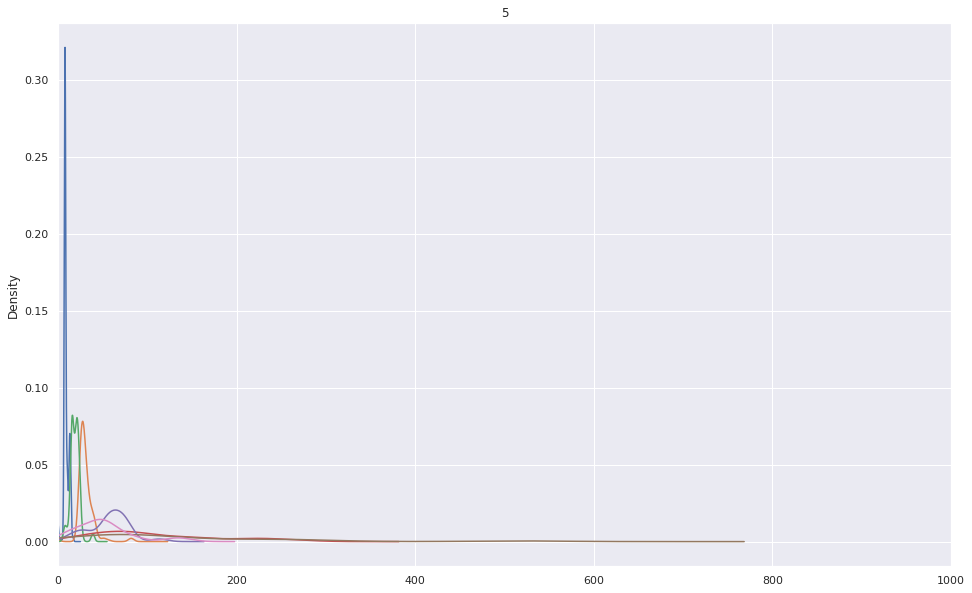

In [29]:
print("count of fillable cabin : ", empty_cabin_but_oterhs_have_cabin_cnt(merged))


#train[train['TicketNumber'].isnull()]
#train['TicketNumber'] = train['TicketNumber'].fillna(0)
# train.describe(include='all')

# Cabin에 대한 요금은?
# for i, row in train[train[Columns.Cabin].isnull() == False].iterrows():
#     cabin_grade = row.str.extract('([A-Za-z]+)', expand=False)
    #print(type(cabin_grade))
    #print("cabin grade", cabin_grade[Columns.Cabin])
    
#train.loc[train[Columns.Cabin].isnull() == False].Cabin.str.extract('([A-Za-z]+)', expand=False)

def make_deck(df):
    '''
    Cabin에서 알파벳을 떼서 Deck 알파벳을 생성한다.
    '''
    df[Columns.Deck] = df[Columns.Cabin].str.extract('([A-Za-z]+)', expand=True)
    return df

merged = make_deck(merged)
merged.describe(include='all')

#df[[Columns.Deck, Columns.Fare]].groupby([Columns.Deck]).mean().plot.bar()  # Deck에 따른 요금제

'''
Deck            
G      13.581250
F      18.958329
T      35.500000
A      39.623887
E      44.950127
D      57.244576
C     106.152051
B     121.814585
'''
def guess_deck_by_fare(fare):
    if fare < 15.0:
        return 'G'
    elif fare  < 25.0:
        return 'F'
    elif fare < 42.0:
        return 'A'
    elif fare < 50.0:
        return 'E'
    elif fare < 70.0:
        return 'D'
    elif fare < 110.0:
        return 'C'
    else:
        return 'B'

def fill_empty_decks(df):
    '''
    비어있는 Deck을 Fare값으로 추정해서 채운다.
    '''
    for idx, row in df[df[Columns.Deck].isnull() == True].iterrows():
        df.loc[idx, Columns.Deck] = guess_deck_by_fare(row[Columns.Fare])
    return df

merged = fill_empty_decks(merged)

# Cabin을 숫자로 변경한다.
def cabin_as_number(df):
    mean_values = df[[Columns.Deck, Columns.Fare]].groupby([Columns.Deck]).mean().sort_values(by=[Columns.Fare])
    print(mean_values.index)
    mapping = {}
    for i in range(mean_values.shape[0]):
        #print("mean_value=", mean_values[Columns.Deck])
        mapping[mean_values.index[i]] = i + 1
    df[Columns.Deck] = df[Columns.Deck].map(mapping)
    return df

merged = cabin_as_number(merged)

    
'''
Deck 마다 Fare의 분포를 그래프로 그려서 확인한다.
'''
decks = merged[Columns.Deck].value_counts().index
#print(decks.shape)
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
for i in range(decks.shape[0]-1):
    print("deck=", decks[i])
    #df[df[Columns.Deck] == decks[i]][Columns.Fare].plot.hist(ax=ax[i])
    ax.set_xlim([0, 1000])
    ax.set_title(decks[i])
    values = merged[merged[Columns.Deck] == decks[i]][Columns.Fare]
    values.plot(kind='kde', ax=ax, use_index=True)
    #ax[i].plot(values)


merged.head(n=50)




#df[df[Columns.Deck].isnull() == False][[Columns.Deck, Columns.Fare]].groupby([Columns.Deck]).mean().plot.bar()
#train[Columns.Age].plot.kde()

#df[df[Columns.Deck].isnull()][Columns.Fare].plot.kde()
#df[df[Columns.Deck].isnull()].shape
#df[df[Columns.Deck].isnull()].head()



# Deck과 Survived의 상관관계를 확인하자.
#sns.countplot(x=Columns.Deck, hue=Columns.Survived, data=df)

# df = df[df['CabinGrade'].isnull() == True]
# df[Columns.Survived].mean()

# df = df[df['CabinGrade'].isnull() == False]
# df[Columns.Survived].mean()



# 중복되는 ticket을 가진 사람들의 cabin은?
# tickets = train[Columns.Ticket].unique()
# for ticket in tickets:
#     if train[train[Columns.Ticket] == ticket].shape[0] > 1:
#         pass

        

### Fare 정리

In [31]:
merged[merged[Columns.Fare].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck
1043,1044,NaN,3,0,60.5,3701,NaN,NaN,1.0,1,1,8


In [32]:
merged[merged[Columns.Fare].isnull()] = merged[Columns.Fare].mean()


Fare(요금) 항목의 분포를 check해 보자.

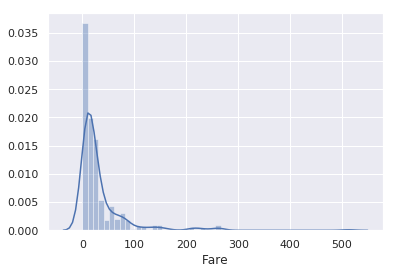

In [33]:
sns.distplot(merged[Columns.Fare])

보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness). <br>
만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. <br>
몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.<br>
outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.

In [34]:
merged[Columns.Fare] = merged[Columns.Fare].map(lambda i : np.log(i) if i > 0 else 0)

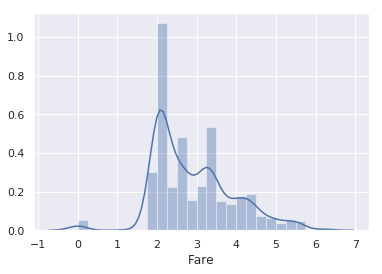

In [35]:
sns.distplot(merged[Columns.Fare])

In [38]:
merged.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck
0,1.0,0.0,3.0,0.0,22.0,A/5 21171,1.981001,NaN,1.0,2.0,1.0,1.0
1,2.0,1.0,1.0,1.0,38.0,PC 17599,4.266662,C85,2.0,2.0,3.0,7.0
2,3.0,1.0,3.0,1.0,26.0,STON/O2. 3101282,2.070022,NaN,1.0,1.0,2.0,1.0
3,4.0,1.0,1.0,1.0,35.0,113803,3.972177,C123,1.0,2.0,3.0,7.0
4,5.0,0.0,3.0,0.0,35.0,373450,2.085672,NaN,1.0,1.0,1.0,1.0
